In [16]:
KERAS_BACKEND='tensorflow'

# Классификация текстов

Для данной задачи выбран датасет с новостными текстами 20newsgroups; мы будем работать с 5 темами: атеизм, хоккей, космос, компьютерная графика и медицина.

Ссылка на описание датасета в sklearn:
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html


In [1]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'rec.sport.hockey', 'sci.space', 'comp.graphics' ,'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)



Переведем документы в векторы признаков:

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2851, 42911)

In [10]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, 
                                 shuffle=True, random_state=42)

## Мультиномиальный наивный Байес (sklearn)

In [4]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, twenty_train.target)

In [5]:
import numpy as np
from sklearn.metrics import *
twenty_test = fetch_20newsgroups(subset='test', categories=categories, 
                                 shuffle=True, random_state=42)
X_test = count_vect.transform(twenty_test.data)
predicted = clf.predict(X_test)

Проверяем на примерах

In [6]:
docs_new = ['Do you believe in God?', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
test_predicted = clf.predict(X_new_counts)

for doc, category in zip(docs_new, test_predicted):
    print('{} => {}'.format(doc, twenty_train.target_names[category]))

Do you believe in God? => alt.atheism
OpenGL on the GPU is fast => comp.graphics


Оцениваем качество

In [7]:
acc = accuracy_score(predicted, twenty_test.target)
micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = f1_score(predicted, twenty_test.target, average = 'micro')
micro_r = f1_score(predicted, twenty_test.target, average = 'micro')
macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = f1_score(predicted, twenty_test.target, average = 'macro')
macro_r = f1_score(predicted, twenty_test.target, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.9478
micro F1=0.9478, micro P=0.9478, micro R=0.9478
macro F1=0.9471, macro P=0.9471, macro R=0.9471



## Логистическая регрессия или метод максимальной энтропии (sklearn)

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train_counts, twenty_train.target)
predicted = clf.predict(X_test)

Проверяем на примерах

In [9]:
test_predicted = clf.predict(X_new_counts)

for doc, category in zip(docs_new, test_predicted):
    print('{} => {}'.format(doc, twenty_train.target_names[category]))

Do you believe in God? => alt.atheism
OpenGL on the GPU is fast => comp.graphics


Оцениваем качество

In [10]:
acc = accuracy_score(predicted, twenty_test.target)
micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = f1_score(predicted, twenty_test.target, average = 'micro')
micro_r = f1_score(predicted, twenty_test.target, average = 'micro')
macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = f1_score(predicted, twenty_test.target, average = 'macro')
macro_r = f1_score(predicted, twenty_test.target, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.9172
micro F1=0.9172, micro P=0.9172, micro R=0.9172
macro F1=0.9170, macro P=0.9170, macro R=0.9170



## Сеть прямого распространения - FNN

In [7]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Using TensorFlow backend.


In [6]:
TEXT_LENGTH = 1800
VOCABULARY_SIZE = 250000
EMBEDDING_DIM = 100
DIMS = 250
MAX_FEATURES = 5000
batch_size = 32

nb_filter = 250
filter_length = 3
hidden_dims = 250
nb_epoch = 20

In [7]:
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(twenty_train.data)
sequences = tokenizer.texts_to_sequences(twenty_train.data)
X_train = tokenizer.sequences_to_matrix(sequences, mode='count')
sequences = tokenizer.texts_to_sequences(twenty_test.data)
X_test = tokenizer.sequences_to_matrix(sequences, mode='count')

NameError: name 'twenty_test' is not defined

In [12]:
print('First seq:',sequences[0])
print('First doc:',X_train[0])
print(len(X_train[0]))

First seq: [13, 4155, 4467, 1107, 107, 163, 29, 228, 143, 850, 5, 3108, 32, 107, 1107, 65, 424, 184, 612, 120, 647, 756, 252, 19, 19, 2081, 31, 631, 75, 63, 451, 850, 5, 147, 2047, 3801, 478, 2, 21, 4, 2240, 521, 3, 1, 2403, 3, 850, 6, 136, 5, 288, 1083, 1, 228, 143, 850, 52, 2599, 122, 1, 2403, 3, 2960, 180, 61, 1399, 1482, 160, 1642, 24, 160, 209, 976, 17, 2403, 11, 1, 228, 143, 26, 4043, 842, 10, 118, 3, 6, 73, 1944, 6, 519, 11, 228, 143, 2, 4884, 23, 850, 4436, 1, 228, 143, 52, 837, 16, 1, 2403, 3, 451, 4596, 24, 209, 1046, 341, 151, 22, 4, 8, 1, 11, 218, 850, 2, 4073, 1006, 6, 288, 17, 132, 8, 207, 9, 1152, 3827, 113, 1598, 288, 5, 1, 133, 43, 15, 4, 178, 469, 11, 10, 27, 1, 570, 133, 43, 21, 2, 17, 1460, 24, 55, 1944, 43, 21, 341, 151, 234, 455, 43, 20, 53, 1, 228, 143, 206, 118, 2558, 432, 96, 17, 1235, 4, 291, 69, 1, 1402, 1110, 218, 275, 10, 27, 17, 2403, 3, 850, 7, 2, 457, 1, 347, 396, 7, 2, 1708, 470, 16, 98, 288, 5, 2482, 5, 3565, 218, 4700, 2309, 2255, 1, 3827, 6, 1, 780, 

In [18]:
from keras.utils import to_categorical

y_train = to_categorical(twenty_train.target, 5)
y_test = to_categorical(twenty_test.target, 5)
y_test[0]

array([ 0.,  0.,  0.,  0.,  1.])

Обучаем модель

In [19]:
model = Sequential()
model.add(Dense(128, input_shape=(MAX_FEATURES,), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size,  validation_split=0.1)

Train on 2565 samples, validate on 286 samples
Epoch 1/20
2565/2565 [==============================] - 1s 376us/step - loss: 0.5752 - acc: 0.8515 - val_loss: 0.1387 - val_acc: 0.9720
Epoch 2/20
2565/2565 [==============================] - 1s 252us/step - loss: 0.0928 - acc: 0.9871 - val_loss: 0.0920 - val_acc: 0.9720
Epoch 3/20
2565/2565 [==============================] - 1s 253us/step - loss: 0.0450 - acc: 0.9957 - val_loss: 0.0759 - val_acc: 0.9720
Epoch 4/20
2565/2565 [==============================] - 1s 264us/step - loss: 0.0259 - acc: 0.9996 - val_loss: 0.0641 - val_acc: 0.9790
Epoch 5/20
2565/2565 [==============================] - 1s 311us/step - loss: 0.0574 - acc: 0.9942 - val_loss: 0.4264 - val_acc: 0.9441
Epoch 6/20
2565/2565 [==============================] - 1s 275us/step - loss: 0.0477 - acc: 0.9914 - val_loss: 0.2302 - val_acc: 0.9476
Epoch 7/20
2565/2565 [==============================] - 1s 330us/step - loss: 0.0096 - acc: 0.9984 - val_loss: 0.0721 - val_acc: 0.9720
E

Оцениваем качество

In [20]:
y_pred = model.predict_classes(X_test)
print()
print(classification_report(twenty_test.target, y_pred))


             precision    recall  f1-score   support

          0       0.93      0.91      0.92       319
          1       0.88      0.92      0.90       389
          2       0.97      0.97      0.97       399
          3       0.88      0.89      0.88       396
          4       0.95      0.90      0.93       394

avg / total       0.92      0.92      0.92      1897



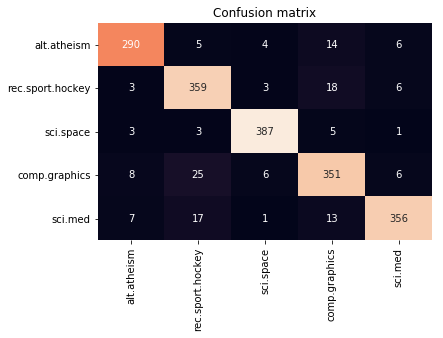

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.heatmap(data=confusion_matrix(twenty_test.target, y_pred), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

## CNN

Уменьшим количество категорий до 4, чтобы немного сократить время работы алгоритма.

In [8]:
categories = ['alt.atheism', 'rec.sport.hockey', 'sci.space', 'comp.graphics' ]
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, 
                                 shuffle=True, random_state=42)

In [9]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import *
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [10]:
tokenizer = Tokenizer(num_words=VOCABULARY_SIZE)
tokenizer.fit_on_texts(twenty_train.data)
sequences = tokenizer.texts_to_sequences(twenty_train.data)

In [ ]:
word_index = tokenizer.word_index
print('{} unique tokens.'.format(len(word_index)))

In [11]:
from sklearn.preprocessing import LabelBinarizer

X_train = pad_sequences(sequences, maxlen=TEXT_LENGTH)
sequences = tokenizer.texts_to_sequences(twenty_test.data)
X_test = pad_sequences(sequences, maxlen=TEXT_LENGTH)

y_train = to_categorical(twenty_train.target, 4)
y_test = to_categorical(twenty_test.target, 4)

print('Shape of data tensor:', X_train.shape)
print('Shape of label tensor:', y_train.shape)
print('Shape of data tensor:', X_test.shape)
print('Shape of label tensor:', y_test.shape)

Shape of data tensor: (2257, 1800)
Shape of label tensor: (2257, 4)
Shape of data tensor: (1501, 1800)
Shape of label tensor: (1501, 4)


In [48]:
print('First doc:',X_train[0])

First doc: [   0    0    0 ..., 3551    2 6608]


Модель

In [200]:
from keras.layers import Embedding, Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.models import Model, Sequential

embedding_layer = Embedding(VOCABULARY_SIZE,
                            EMBEDDING_DIM,
                            input_length=TEXT_LENGTH,
                            trainable=True)


sequence_input = Input(shape=(TEXT_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 4, activation='relu')(embedded_sequences)
x = MaxPooling1D(4)(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
preds = Dense(4, activation='sigmoid')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['acc'])

In [50]:
model.fit(X_train, y_train, epochs=nb_epoch, batch_size=128, validation_split=0.1)

Train on 2031 samples, validate on 226 samples
Epoch 1/20
2031/2031 [==============================] - 33s 16ms/step - loss: 1.3755 - acc: 0.2885 - val_loss: 1.3612 - val_acc: 0.2965
Epoch 2/20
2031/2031 [==============================] - 32s 16ms/step - loss: 1.3606 - acc: 0.3309 - val_loss: 1.3697 - val_acc: 0.2699
Epoch 3/20
2031/2031 [==============================] - 33s 16ms/step - loss: 1.3495 - acc: 0.3402 - val_loss: 1.3338 - val_acc: 0.3274
Epoch 4/20
2031/2031 [==============================] - 32s 16ms/step - loss: 1.3374 - acc: 0.3609 - val_loss: 1.3464 - val_acc: 0.3274
Epoch 5/20
2031/2031 [==============================] - 33s 16ms/step - loss: 1.3246 - acc: 0.3653 - val_loss: 1.3163 - val_acc: 0.3451
Epoch 6/20
2031/2031 [==============================] - 32s 16ms/step - loss: 1.2973 - acc: 0.4111 - val_loss: 1.3136 - val_acc: 0.3319
Epoch 7/20
2031/2031 [==============================] - 32s 16ms/step - loss: 1.2562 - acc: 0.4195 - val_loss: 1.2410 - val_acc: 0.4469
E

In [51]:
predictions = model.predict(X_test)

def probs_to_classes(probas):
    classes = np.zeros(probas.shape, dtype=np.int)
    for i, row in enumerate(probas):
        classes[i, np.argmax(row)] = 1
    return classes



y_pred = probs_to_classes(predictions)

array([0, 0, 1, 0])

Оцениваем качество

In [202]:
print(classification_report(y_test, y_pred, target_names=categories))

               precision    recall  f1-score   support

  alt.atheism       0.94      0.83      0.88       319
comp.graphics       0.87      0.90      0.89       389

  avg / total       0.90      0.90      0.90      1501



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 4, does not match size of target_names, 2
  .format(len(labels), len(target_names))


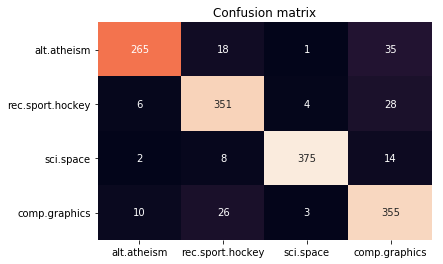

In [88]:
def probs_to_labels(y_pred):
    buf = []
    for i in y_pred:
        for a in range(len(i)):
            if i[a]:
                buf.append(a) 
    return buf

pred = probs_to_labels(y_pred)
labels = categories

sns.heatmap(data=confusion_matrix(twenty_test.target, pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

## RNN

In [12]:
from keras.layers import Embedding, Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.models import Model, Sequential

embedding_layer = Embedding(VOCABULARY_SIZE,
                            EMBEDDING_DIM,
                            input_length=TEXT_LENGTH,
                            trainable=True)


sequence_input = Input(shape=(TEXT_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Bidirectional(LSTM(128))(embedded_sequences)
preds = Dense(4, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['acc'])

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=batch_size,  validation_split=0.1)

Train on 2031 samples, validate on 226 samples
Epoch 1/5
 736/2031 [=========>....................] - ETA: 512s - loss: 1.3867 - acc: 0.2378

In [ ]:
y_pred = model.predict_classes(X_test)
print()
print(classification_report(twenty_test.target, y_pred))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.heatmap(data=confusion_matrix(twenty_test.target, y_pred), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

## FastText

In [91]:
import fasttext

Решаем задачу бинарной классификации:

In [179]:
import nltk 
from nltk import word_tokenize
import pymorphy2
from string import punctuation
from nltk.corpus import stopwords

In [156]:
categories = ['alt.atheism','comp.graphics' ] 
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, 
                                 shuffle=True, random_state=42)

In [195]:
import re


with open ('train.txt', 'w') as f:
    for s in range(len(twenty_train.data)):
        string = re.sub( '\n', ' ', twenty_train.data[s])
        l = string + ' __label__' + str(twenty_train.target[s]) + '\n'
        f.write(l)
        
        
with open ('test.txt', 'w') as f1:
    for s in range(len(twenty_test.data)):
        string = re.sub( '\n', ' ', twenty_test.data[s])
        l = string + ' __label__' + str(twenty_test.target[s]) + '\n'
        f1.write(l)
    

In [196]:
classifier = fasttext.supervised('train.txt', 'model')

Результат на "сыром" датасете:

In [197]:
result = classifier.test('test.txt')
print ('P@1:', result.precision)
print ('R@1:', result.recall)
print ('Number of examples:', result.nexamples)

P@1: 0.7161016949152542
R@1: 0.7161016949152542
Number of examples: 708


In [198]:
texts = ['christians', 'graphics']
labels = classifier.predict(texts)
print (labels)

[['1'], ['1']]


In [193]:
import nltk 
from nltk import word_tokenize
import pymorphy2
from string import punctuation
from nltk.corpus import stopwords

with open ('train1.txt', 'w') as f:
    for s in range(len(twenty_train.data)):
        string = re.sub( '\n', ' ', twenty_train.data[s])
        tokens = word_tokenize(string)
        words = [i for i in tokens if i.isalpha() and not i in stopwords.words('english')]
        string1 = ' '.join(i for i in words)
        l = string1 + ' __label__' + str(twenty_train.target[s]) + '\n'
        f.write(l)
        
        
with open ('test1.txt', 'w') as f1:
    for s in range(len(twenty_test.data)):
        string = re.sub( '\n', ' ', twenty_test.data[s])
        tokens = word_tokenize(string)
        words = [i for i in tokens if i.isalpha() and not i in stopwords.words('english')]
        string1 = ' '.join(i for i in words)
        l = string1 + ' __label__' + str(twenty_test.target[s]) + '\n'
        f1.write(l)

Результат на датасете без стоп-слов и небуквенных символов:

In [194]:
classifier = fasttext.supervised('train1.txt', 'model')
result = classifier.test('test1.txt')
print ('P@1:', result.precision)
print ('R@1:', result.recall)
print ('Number of examples:', result.nexamples)

P@1: 0.5790960451977402
R@1: 0.5790960451977402
Number of examples: 708
